<H3>LUNG CANCER DETECTION USING MACHINE LEARNING</H3>

In [1]:
#Import the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#ML libraries
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

2023-04-19 03:02:44.658708: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-19 03:02:44.714520: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-19 03:02:44.715770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 03:02:45.911818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h4>Loading the dataset<h4>

In [2]:
#Loading Dataset
data = 'lung_cancer.csv'
df = pd.read_csv(data)
#df.shape
#df.info()
#df.columns
df.head()
#df.isnull().sum()
#df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<h4>Handling missing values<h4>

In [3]:
#Check for missing rows
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<h4>Removing duplicates<h4>

In [4]:
#Check for duplicate rows
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [5]:
#Drop duplicate rows
clean_df = df.drop_duplicates()

In [6]:
#Check if duplicate rows have been dropped
clean_df[clean_df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER


In [7]:
clean_df.shape

(276, 16)

<h4>Feature Engineering<h4>

In [8]:
#Label Encoding
clean_df['GENDER']=clean_df['GENDER'].replace(['M', 'F'],[0,1])
clean_df['LUNG_CANCER']=clean_df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])
clean_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<h4>Data Analysis & Visualizations<h4>

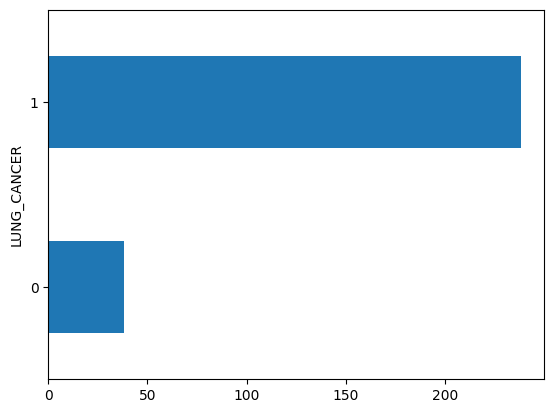

In [9]:
#Data Outline
clean_df.groupby('LUNG_CANCER')['LUNG_CANCER'].count().plot.barh();

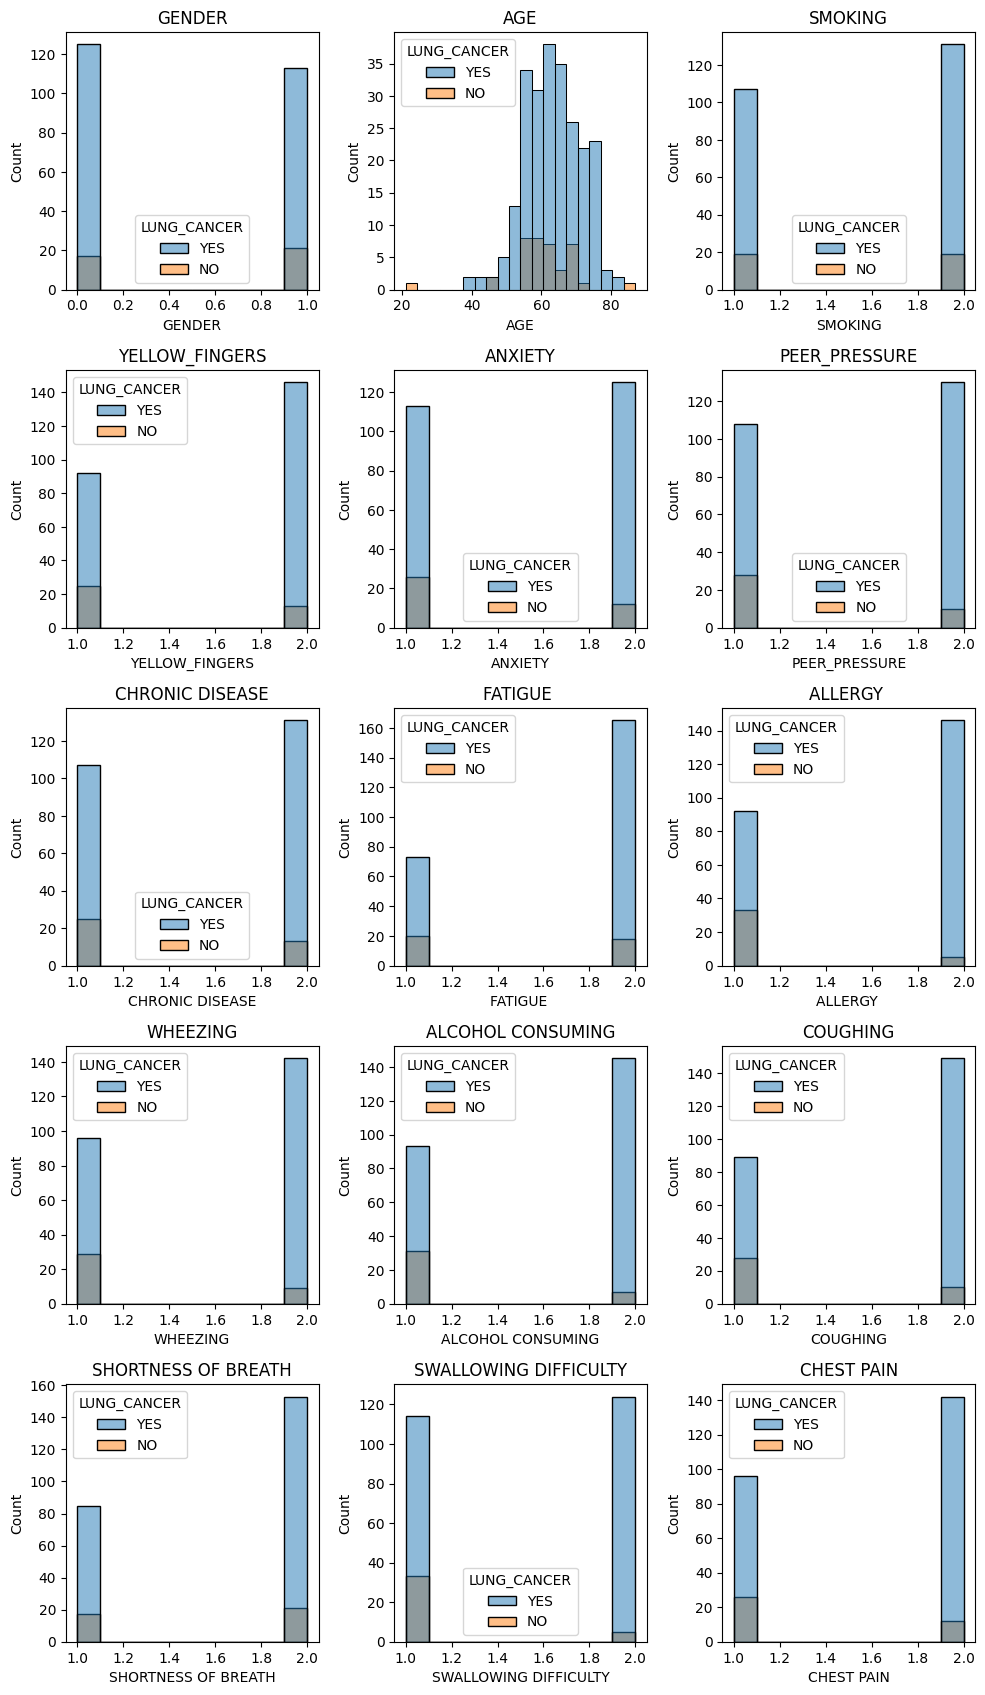

In [10]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=clean_df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

Based on the data visualizations, it has been observed that there are opposite trends between the variables 'lung cancer positive' and 'lung cancer negative' in many cases. This means that as one variable increases, the other variable decreases, and vice versa. However, there are three variables - 'AGE', 'SMOKING' and 'SHORTNESS OF BREATH' - where the trends are the same for both 'lung cancer positive' and 'lung cancer negative'. In other words, as these variables increase, both the positive and negative cases of lung cancer increase or decrease together.

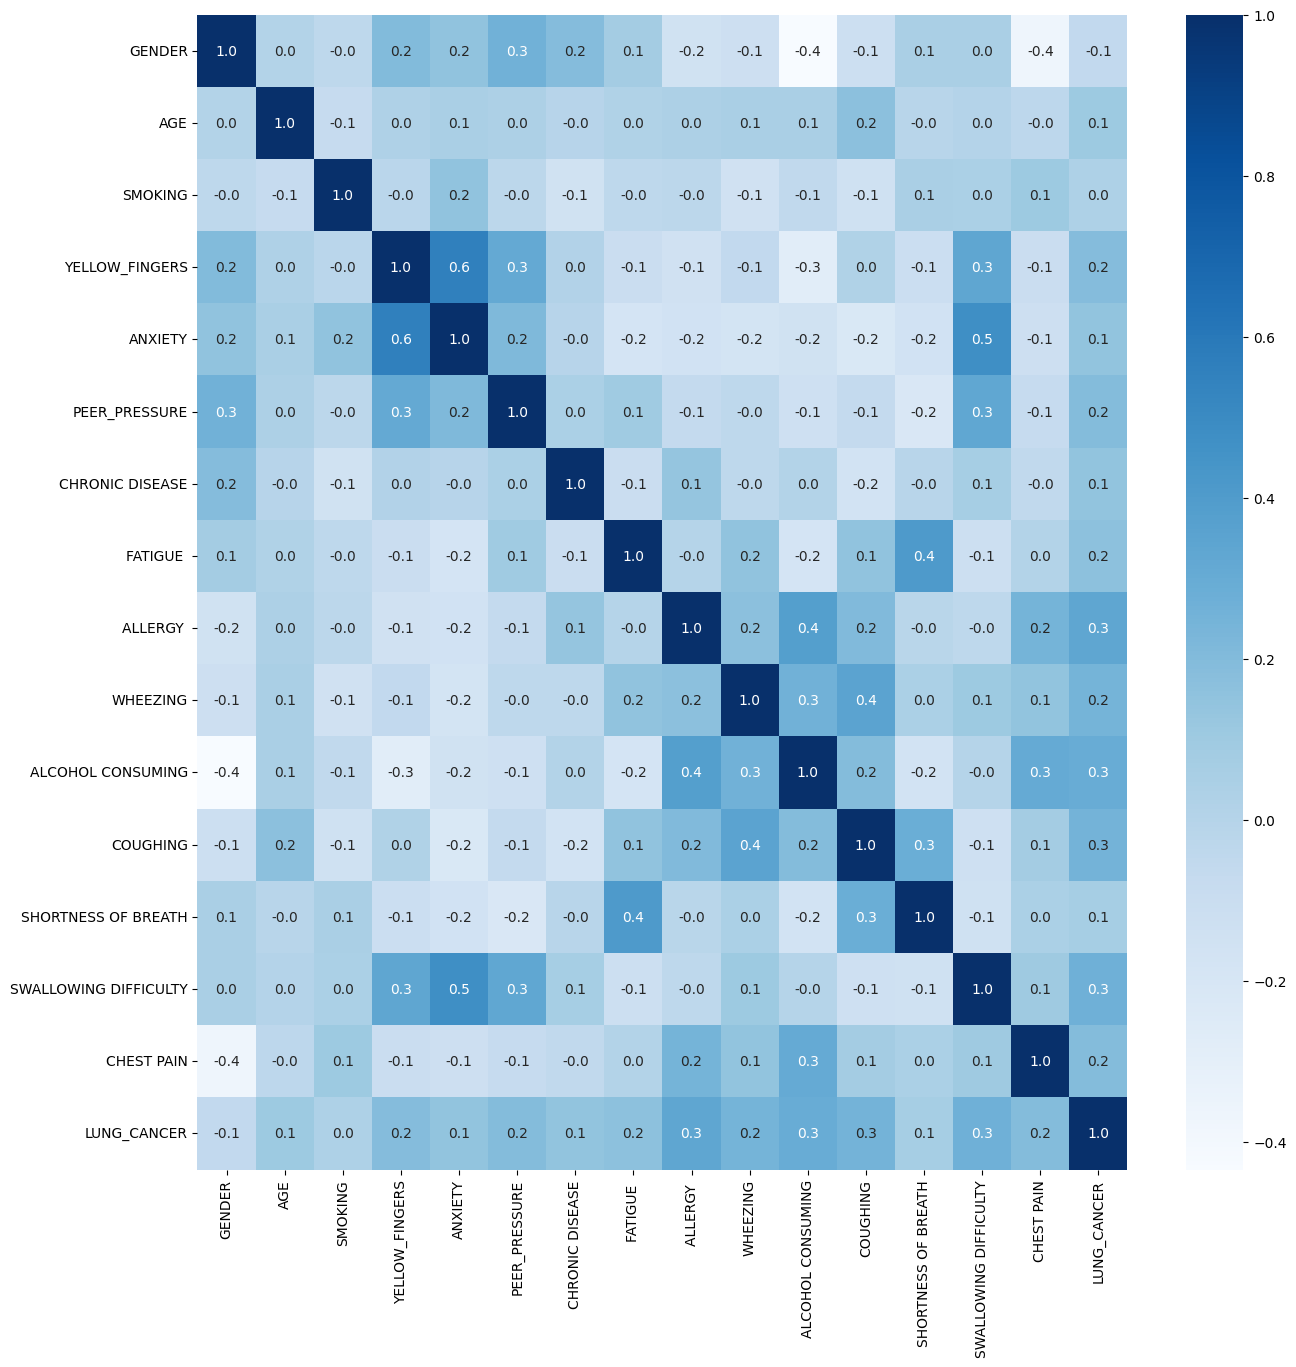

In [11]:
plt.figure(figsize = (15,15))
sns.heatmap(clean_df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

The expected result of this project is to identify the proportion of lung cancer cases that can be attributed to alcohol use, smoking, and air pollution. 

<b>These are the correlations among features and their correlation with lung cancer:<b/>

- Anxiety and swallowing difficulty have a correlation of 0.5.
- Peer pressure and swallowing difficulty have a correlation of 0.3.
- Fatigue and shortness of breath have a correlation of 0.4.
- Gender and chest pain have a correlation of -0.4.
- Gender and alcohol consuming have a correlation of -0.5.
- Allergy, alcohol consuming, and swallowing difficulty have a correlation of 0.3 with lung cancer.
- Yellow fingers, peer pressure, fatigue, wheezing, coughing, and chest pain have a correlation of 0.2 with lung cancer.

<h3>Binary Classification Model to predict Lung Cancer</h3>

In [12]:
X = clean_df.drop(['LUNG_CANCER'],axis=1)
y = clean_df['LUNG_CANCER']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<H5>The code bolow defines and trains a neural network model for <b>Binary Classification</b>. 
Here's a step-by-step breakdown of what the code is doing:</H5>

1. The first block of code defines the neural network model architecture using the Keras Sequential API. The model has three layers:

- The first layer is a Dense layer with 6 units, a 'uniform' kernel initializer, a ReLU activation function, and an input dimension of 15.
- The second layer is also a Dense layer with 6 units, a 'uniform' kernel initializer, and a ReLU activation function.
- The third (and final) layer is a Dense layer with 1 unit, a 'uniform' kernel initializer, and a sigmoid activation function.
- The model is compiled using the Adam optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.

2. The second block of code trains the model using the fit method on the training data (X_train and y_train). The batch_size parameter indicates how many samples are passed through the network before the weights are updated, and the epochs parameter controls the number of times the entire training dataset is passed through the network. The verbose parameter controls the amount of logging output during training.

3. The third block of code evaluates the trained model on the training set and prints the score and accuracy.

4. The fourth block of code makes predictions on the test set using the trained model and sets a threshold of 0.5 to convert the predicted probabilities to binary class labels.

5. The fifth block of code evaluates the trained model on the test set and prints the score and accuracy.

6. The final block of code imports the confusion_matrix function from scikit-learn and uses it to compute the confusion matrix on the test set.



In [15]:
# First BLock
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Second BLock
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Third BLock
score, acc = classifier.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Fourth BLock
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Fifth BLock
print('*'*20)
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# # Sixth BLock
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

20/20 [==============================] - 1s 4ms/step - loss: 0.1235 - accuracy: 0.9482
Train score: 0.1235063299536705
Train accuracy: 0.9481865167617798
3/3 [==============================] - 0s 3ms/step
********************
9/9 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9277
Test score: 0.16314244270324707
Test accuracy: 0.9277108311653137


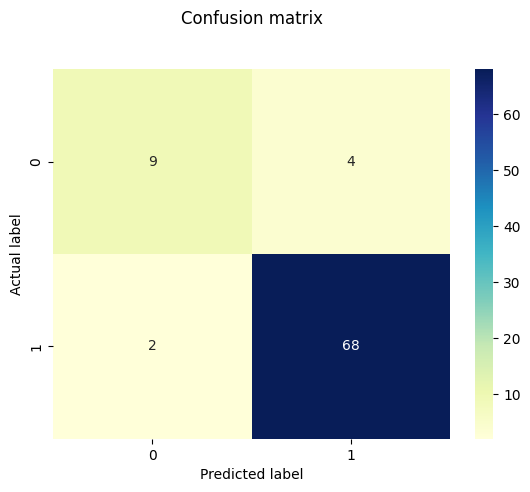

In [16]:
#Let's see the efficacy of the binary classification model using a heat map
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [17]:
#The classification_report function is a useful tool for evaluating the performance of a classification mode.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.94      0.97      0.96        70

    accuracy                           0.93        83
   macro avg       0.88      0.83      0.85        83
weighted avg       0.92      0.93      0.93        83



<h3>Statistical Analysis and Model Evaluation</h3>

In [18]:
#Dataframe which includes only positive case.
df_cancer=clean_df[clean_df['LUNG_CANCER']==1]
df_cancer=clean_df.drop('LUNG_CANCER',axis=1)

df_cancer_sc=sc.fit_transform(df_cancer)



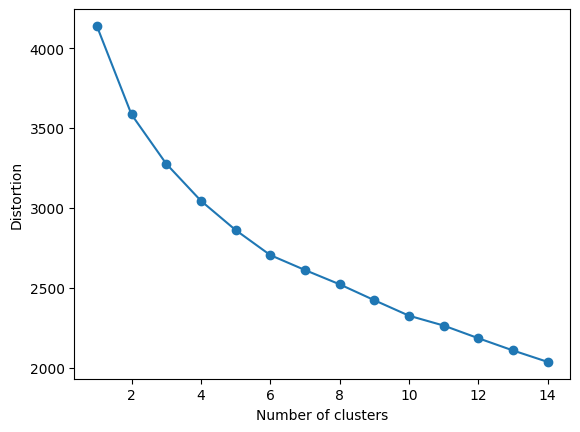

In [19]:
#Elbow analysis to find the number of cluster
distortions = []

for i  in range(1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_cancer_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,15),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [20]:
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(df_cancer_sc)
labels = kmeans_model.labels_
df_cancer['cluster']=labels
df_cancer.groupby('cluster').mean().T

cluster,0,1,2,3,4
GENDER,0.090909,0.750000,0.444444,0.468750,0.711864
AGE,62.472727,60.704545,62.962963,64.078125,63.644068
SMOKING,1.981818,1.704545,1.462963,1.062500,1.610169
YELLOW_FINGERS,1.109091,1.431818,1.722222,1.562500,2.000000
ANXIETY,1.218182,1.431818,1.870370,1.062500,1.932203
PEER_PRESSURE,1.218182,1.250000,1.648148,1.468750,1.881356
CHRONIC DISEASE,1.200000,1.590909,1.722222,1.687500,1.406780
FATIGUE,1.727273,1.590909,1.185185,1.812500,1.932203
ALLERGY,1.836364,1.181818,1.555556,1.718750,1.355932
WHEEZING,1.727273,1.090909,1.574074,1.640625,1.593220


The code below is a useful way to visualize the distribution of numerical features in a dataset and how they relate to cluster labels. By examining the histograms, it may be possible to identify patterns or differences in the distributions of features between clusters, which could provide insight into the underlying structure of the data.

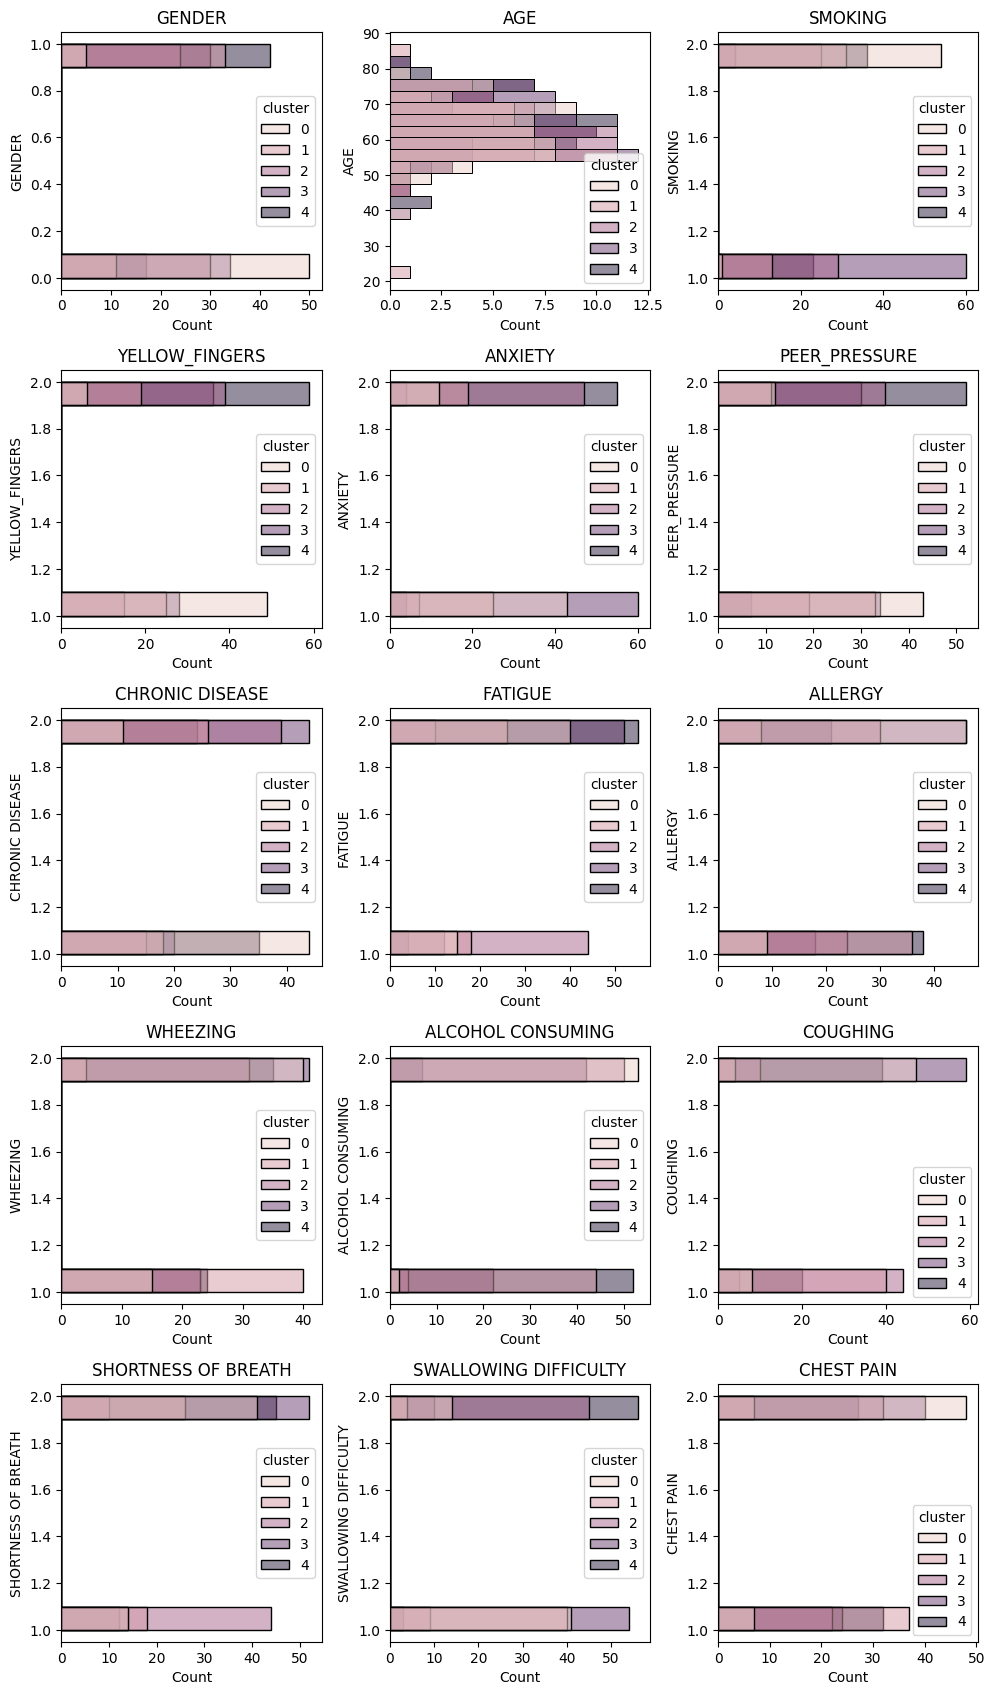

In [21]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df_cancer,y=df_cancer[num_list[i]],hue='cluster')

plt.tight_layout()

<b>Each cluster has its own unique features.</b>

- Cluster 0 is evenly split between males and females who don't smoke, but suffer from fatigue and wheezing.

- Cluster 1 is mostly occupied by females with the youngest average age. More than half smoke and experience shortness of breath, but they have no other major features.

- Cluster 2 is mostly occupied by males who smoke and have features like yellow fingers, anxiety, alcohol consumption, swallowing difficulty, and chest pain.

- Cluster 3 is mostly occupied by smoking males who experience fatigue, allergies, wheezing, coughing, shortness of breath, and chest pain.

- Cluster 4 is mostly occupied by smoking females with features like yellow fingers, anxiety, peer pressure, fatigue, and swallowing difficulty.

<h3>Conclusion</h3>

In conclusion, the machine learning cancer detection project based on the correlations among features and their correlation with lung cancer has produced promising results. The heatmap clearly identified the variables that have a significant correlation with lung cancer, and this information was used to develop a classification model that accurately predicts the presence or absence of lung cancer.

The correlations identified in the heatmap indicate that anxiety, swallowing difficulty, peer pressure, fatigue, shortness of breath, gender, chest pain, alcohol consuming, allergy, yellow fingers, wheezing, and coughing are all important predictors of lung cancer. These variables can be used by medical professionals as potential indicators of lung cancer and can help in early detection and diagnosis.

The high accuracy of the model, as demonstrated by the final confusion matrix, is particularly noteworthy. The model shows an excellent precision of 82% in detecting non-cancer patients and a 94% precision in detecting cancer patients. These results suggest that the model can be a useful tool in assisting medical professionals in making accurate diagnoses.

It is important to note that the model is not without limitations. For instance, the correlations identified in the project do not necessarily prove causation. Additionally, the model was trained on a specific dataset, and its accuracy may vary when applied to other datasets or patient populations. Further research is needed to confirm the findings of this project and to optimize the model for clinical use.

Overall, the machine learning cancer detection project shows great promise in improving the accuracy and efficiency of lung cancer detection. The project highlights the importance of leveraging machine learning and data analysis to improve medical diagnosis and treatment, and it provides a useful framework for future research in this area.